In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Heart Disease Dataset Overview

This dataset includes 918 patient records and 12 features related to cardiovascular health. The goal is to predict the presence of heart disease.

- The `HeartDisease` column is the target variable (1 = disease, 0 = healthy).
- Features such as `ChestPainType`, `Oldpeak`, and `ExerciseAngina` are likely strong predictors.


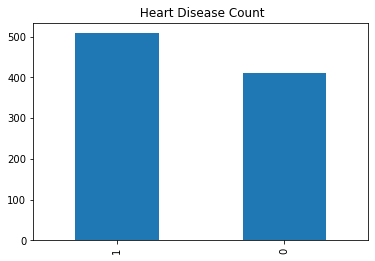

Text(0, 0.5, 'Count')

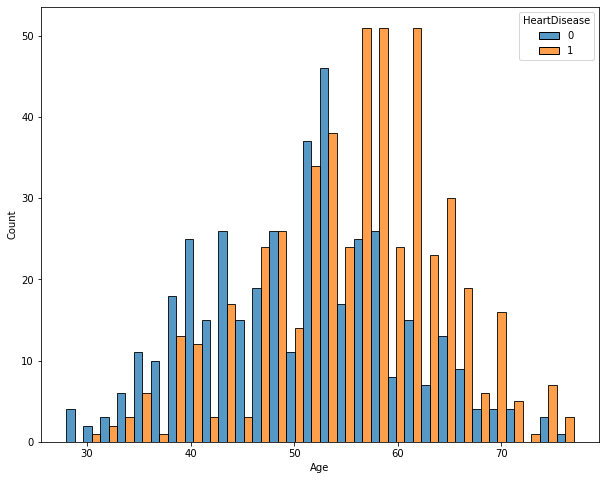

In [9]:
df["HeartDisease"].value_counts().plot(kind = "bar", title = " Heart Disease Count")


plt.show()
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = "Age", hue= "HeartDisease",multiple = "dodge", bins = 30)
plt.xlabel("Age")
plt.ylabel("Count")

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.select_dtypes(include=["object"]).columns
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]
y_binary = []

for val in y:
    if val < 0.5:
        y_binary.append(0)
    else:
        y_binary.append(1)


y = pd.Series(y_binary)

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(y_train.unique())  # Should print [0, 1]


[0 1]


In [74]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

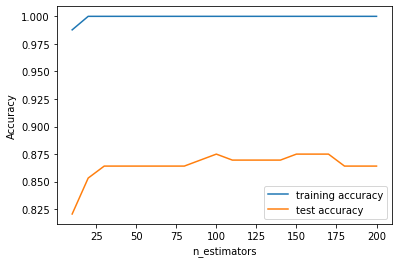

In [75]:
n_estimators_range = range(10, 210, 10)
train_acc_rf = []
test_acc_rf = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_acc_rf.append(rf.score(X_train, y_train))
    test_acc_rf.append(rf.score(X_test, y_test))

plt.plot(n_estimators_range, train_acc_rf, label='training accuracy')
plt.plot(n_estimators_range, test_acc_rf, label='test accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

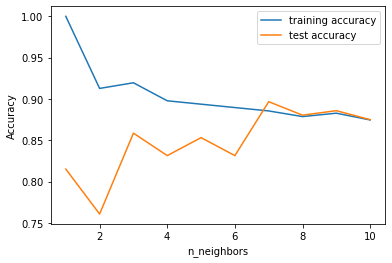

In [76]:
training_accuracy_knn = []
test_accuracy_knn = []

neighbor_settings = range(1,11)

for n_neighbors in neighbor_settings:
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(X_train, y_train)
  training_accuracy_knn.append(knn.score(X_train, y_train))
  test_accuracy_knn.append(knn.score(X_test, y_test))
    
    
plt.plot(neighbor_settings, training_accuracy_knn, label = 'training accuracy')
plt.plot(neighbor_settings, test_accuracy_knn, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [77]:
print("Logistic Regression Accuracy:", accuracy_score(y_test,y_pred_log))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test,y_pred_knn))

Logistic Regression Accuracy: 0.8532608695652174
Random Forest Classifier Accuracy: 0.875
KNN Accuracy: 0.8967391304347826


In [82]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("KNN Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Random Forest Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

KNN Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted 

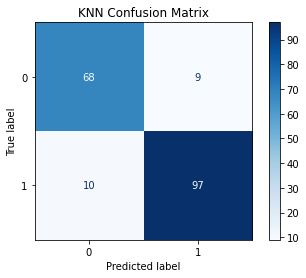

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


## Model Performance Summary

Three models were evaluated for heart disease prediction:

- **Logistic Regression**
  - Accuracy: 0.85
  - Strong recall for class 0 and precision for class 1, but overall performance was lowest among the models.

- **Random Forest**
  - Accuracy: 0.88
  - Consistently high scores across all metrics, but slightly outperformed by KNN.

- **K-Nearest Neighbors (KNN)**
  - Accuracy: 0.90
  - Achieved the highest precision, recall, and F1-scores for both classes.

# Heart Disease Prediction


##  Data Exploration
- `.head()`, `.info()`, `.describe()`
- Plots showing class balance, age distribution, etc.

##  Data Preprocessing
- Categorical encoding
- Scaling 
- Train/test split

##  Model Training
- Logistic Regression
- Random Forest
- KNN

##  Evaluation
- Accuracy, precision, recall, F1
- Confusion matrix
- Summary table comparing models

##  Conclusions
- **K-Nearest Neighbors (KNN)** demonstrated the best overall performance, making it the most effective model for heart disease prediction on this dataset.

